In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



In [3]:
np.random.seed(0)



In [5]:
def sin(x, T=100):
    return np.sin(2.0*np.pi*x / T)

def problem(T=100, noise_amp = 0.05):
    x = np.arange(0, 2*T + 1)
    noise = noise_amp*np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise




Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 1s 4ms/step - loss: 0.5068 - val_loss: 0.2771
Epoch 2/500
158/158 [==============================] - 0s 494us/step - loss: 0.3737 - val_loss: 0.1931
Epoch 3/500
158/158 [==============================] - 0s 469us/step - loss: 0.1936 - val_loss: 0.1109
Epoch 4/500
158/158 [==============================] - 0s 525us/step - loss: 0.0865 - val_loss: 0.0263
Epoch 5/500
158/158 [==============================] - 0s 632us/step - loss: 0.0468 - val_loss: 0.0346
Epoch 6/500
158/158 [==============================] - 0s 654us/step - loss: 0.0351 - val_loss: 0.0247
Epoch 7/500
158/158 [==============================] - 0s 499us/step - loss: 0.0291 - val_loss: 0.0252
Epoch 8/500
158/158 [==============================] - 0s 601us/step - loss: 0.0236 - val_loss: 0.0138
Epoch 9/500
158/158 [==============================] - 0s 434us/step - loss: 0.0183 - val_loss: 0.0067
Epoch 10/500
158/158 [========

158/158 [==============================] - 0s 596us/step - loss: 0.0020 - val_loss: 0.0012
Epoch 80/500
158/158 [==============================] - 0s 538us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 81/500
158/158 [==============================] - 0s 620us/step - loss: 0.0021 - val_loss: 0.0012
Epoch 82/500
158/158 [==============================] - 0s 473us/step - loss: 0.0018 - val_loss: 0.0013
Epoch 83/500
158/158 [==============================] - 0s 406us/step - loss: 0.0018 - val_loss: 0.0014
Epoch 84/500
158/158 [==============================] - 0s 456us/step - loss: 0.0021 - val_loss: 0.0045
Epoch 85/500
158/158 [==============================] - 0s 494us/step - loss: 0.0022 - val_loss: 0.0017
Epoch 86/500
158/158 [==============================] - 0s 471us/step - loss: 0.0030 - val_loss: 9.1777e-04
Epoch 87/500
158/158 [==============================] - 0s 503us/step - loss: 0.0019 - val_loss: 8.4805e-04
Epoch 88/500
158/158 [==============================] - 0s 482us/step

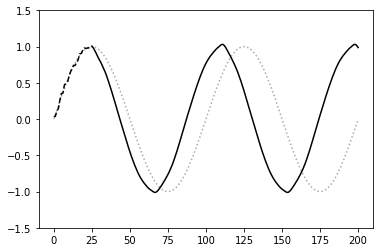

In [6]:
T = 100
f = problem(T)

data_length = 2*T
maxlen = 25

data=[]
target=[]

for i in range(0, data_length - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])
    
X = np.array(data).reshape(len(data), maxlen, 1)
y = np.array(target).reshape(len(data), 1)



In [8]:

N_train = int(len(data) * 0.9)
N_test = len(data) - N_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=N_test)



In [9]:
n_in = len(X[0][0])
n_hidden = 20
n_out = len(y[0])



In [10]:
def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model = Sequential()
model.add(SimpleRNN(n_hidden,
                    kernel_initializer=weight_variable,
                    input_shape=(maxlen, n_in)))
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('linear'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error',
              optimizer=optimizer)


Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 1s 8ms/step - loss: 0.4717 - val_loss: 0.2634
Epoch 2/500
158/158 [==============================] - 0s 781us/step - loss: 0.3992 - val_loss: 0.2106
Epoch 3/500
158/158 [==============================] - 0s 828us/step - loss: 0.2590 - val_loss: 0.1244
Epoch 4/500
158/158 [==============================] - 0s 828us/step - loss: 0.1089 - val_loss: 0.0543
Epoch 5/500
158/158 [==============================] - 0s 664us/step - loss: 0.0533 - val_loss: 0.0576
Epoch 6/500
158/158 [==============================] - 0s 701us/step - loss: 0.0493 - val_loss: 0.0533
Epoch 7/500
158/158 [==============================] - 0s 467us/step - loss: 0.0355 - val_loss: 0.0345
Epoch 8/500
158/158 [==============================] - 0s 491us/step - loss: 0.0316 - val_loss: 0.0269
Epoch 9/500
158/158 [==============================] - 0s 645us/step - loss: 0.0285 - val_loss: 0.0193
Epoch 10/500
158/158 [========

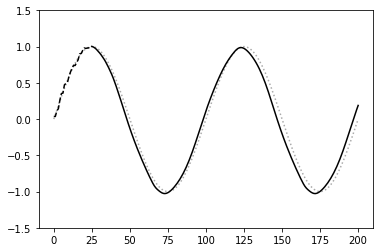

In [11]:

epochs = 500
batch_size = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])

truncate = maxlen
Z = X[:1]  # 元データの最初の一部だけ切り出し

original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

for i in range(data_length - maxlen + 1):
    z_ = Z[-1:]
    y_ = model.predict(z_)
    sequence_ = np.concatenate(
        (z_.reshape(maxlen, n_in)[1:], y_),
        axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))



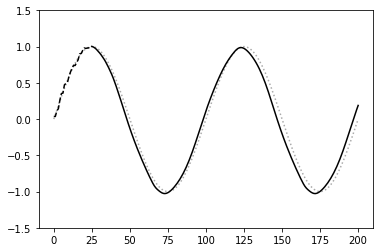

In [12]:
plt.ylim([-1.5, 1.5])
plt.plot(problem(T, noise_amp=0), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.plot(predicted, color='black')
plt.show()